<a href="https://colab.research.google.com/github/sahil-bhatia-iitbhu/deep_understanding_of_deep_learning/blob/main/02_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRADIENT DESCENT

1. Overview
2. Local Minima Issue
3. Deep learning success despite local minima issue
    
    a. Increased dimentionality to allow fewer local minimas to exist, as with more dimentions it gets difficult for such point to exist which is minima in all directions (dimensions)
    
    b. Existence of multiple good solutions through different initialization and parameter selections which underpowers local minima issue



### 1D Gradient Descent

In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
def fx(x):
  return np.cos(2*np.pi*x)+x**2

def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x)+2*x

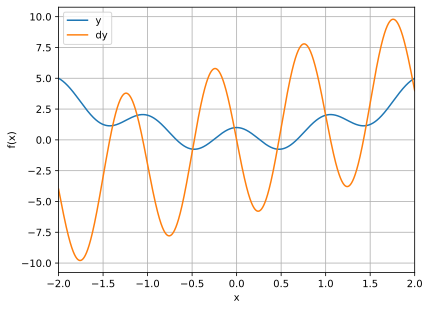

In [ ]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [ ]:
# random starting point
localmin = np.random.choice(x,1)
# localmin = np.array([0])
print(f"initiation: ",localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

print(f"final minima: ",localmin)

initiation:  [0.044]
final minima:  [0.47580245]


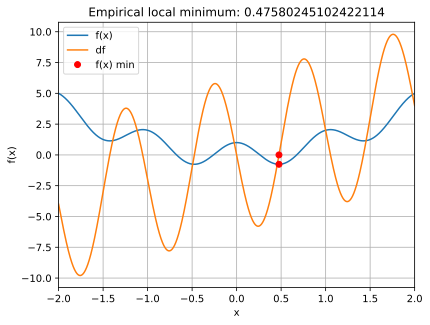

In [ ]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

In [ ]:
# random starting point
localmin = np.random.choice(x,1)
# localmin = np.array([0])
print(f"initiation: ",localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin[0]
  modelparams[i,1] = grad[0]

print(f"final minima: ",localmin)

initiation:  [-0.492]
final minima:  [-0.47580245]


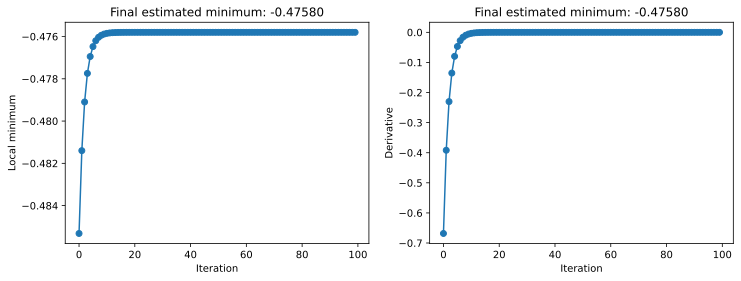

In [ ]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

### 2D Gradient Descent

In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

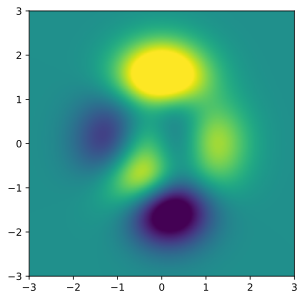

In [ ]:

# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [ ]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [ ]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[-0.1265903 -1.8050784]


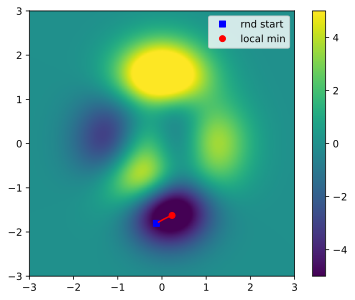

In [ ]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

### Parametric Experimentation on learning rate and epochs

In [4]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

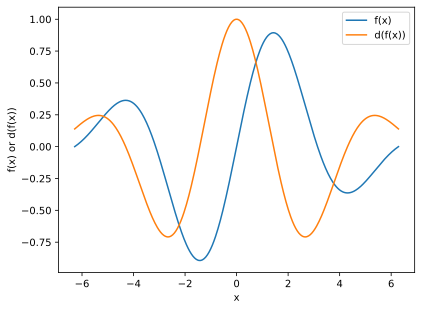

In [5]:
# the function
x = np.linspace(-2*np.pi,+2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*0.05)

# its derivative
df = np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * (-0.1*x) * np.exp(-x**2*0.05)

# plot for inspection
plt.plot(x,fx)
plt.plot(x,df)
plt.legend(['f(x)','d(f(x))'])
plt.xlabel('x')
plt.ylabel('f(x) or d(f(x))')
plt.show()

In [6]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*0.05)

def deriv(x):
  return np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * (-0.1*x) * np.exp(-x**2*0.05)

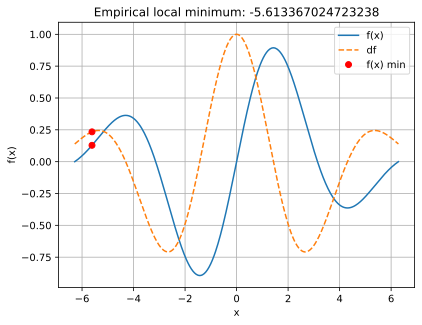

In [7]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

# plot the results
plt.plot(x, fx(x))
plt.plot(x, deriv(x), '--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

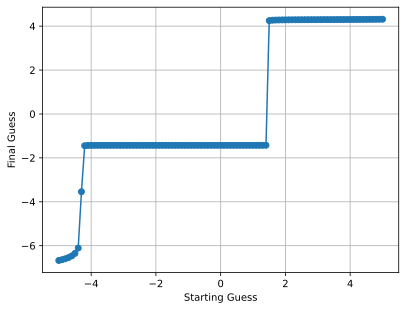

In [8]:
# Experiment 1 : systematically varying the starting point

startlocs = np.linspace(-5,5,101)
finallocs = np.zeros(len(startlocs))

# learning parameters
learning_rate = .01
training_epochs = 1000

# loop over starting points
for i,localmin in enumerate(startlocs):

  # run over epochs
  for j in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # store the final localmin
  finallocs[i] = localmin

# plot the results
plt.plot(startlocs,finallocs,'o-')
plt.grid()
plt.xlabel('Starting Guess')
plt.ylabel('Final Guess')
plt.show()

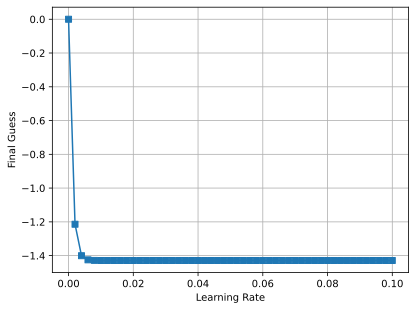

In [9]:
# Experiment 2 : systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,51)
finalres = np.zeros(len(learningrates))

# learning parameters
# learning_rate = .01
training_epochs = 1000

# loop over starting points
for i,learning_rate in enumerate(learningrates):

  # force start from 0
  localmin = 0

  # run over epochs
  for j in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # store the final localmin
  finalres[i] = localmin

# plot the results
plt.plot(learningrates,finalres,'s-')
plt.grid()
plt.xlabel('Learning Rate')
plt.ylabel('Final Guess')
plt.show()

In [12]:
# interaction between learning rates and training epochs

# Experiment 2 : systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,51)
trainingepochs = np.linspace(10,1000,100)
finalres = np.zeros((len(learningrates),len(trainingepochs)))

# learning parameters
# learning_rate = .01
# training_epochs = 1000

# loop over starting points
for i,learning_rate in enumerate(learningrates):

  for j,training_epochs in enumerate(trainingepochs):
    # force start from 0
    localmin = 0

    # run over epochs
    for k in range(int(training_epochs)):
      grad = deriv(localmin)
      localmin = localmin - learning_rate*grad

    # store the final localmin
    finalres[i,j] = localmin

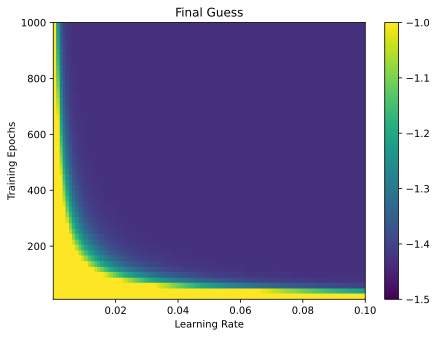

In [13]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],trainingepochs[0],trainingepochs[-1]],origin='lower',aspect='auto',vmin=-1.5,vmax=-1.0)
plt.colorbar()
plt.xlabel('Learning Rate')
plt.ylabel('Training Epochs')
plt.title('Final Guess')
plt.show()

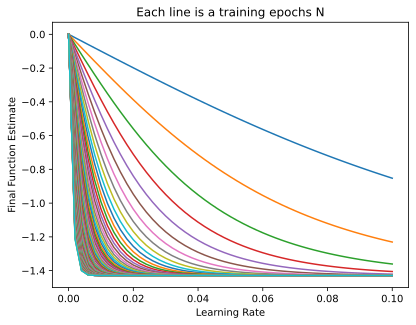

In [16]:
plt.plot(learningrates,finalres)
plt.title('Each line is a training epochs N')
plt.xlabel('Learning Rate')
plt.ylabel('Final Function Estimate')
plt.show()

### Dynamic Learning Rate

**There are 4 ways to proportionate the learning rate :**

1. Training Epochs (Time) : Good method, often done in blocks, but unrelated to model performance and current state of training routine.
2. Derivative : Incorporated in the concept of optimizers. Adaptive to the problem. Requires additional parameters and appropriate scaling.
3. Loss : Works only when loss is in the range [0,1]. Hence, mostly needs scaling.
4. Current local minimum value : Too many assumptions required for it to succeed.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [42]:
# define the range of x
x = np.linspace(-2,2,2001)

# function
def fx(x):
  return np.sin(x) * np.exp(-x**2*0.05)

def deriv(x):
  return np.cos(x) * np.exp(-x**2*0.05) + np.sin(x) * (-0.1*x) * np.exp(-x**2*0.05)

In [43]:
# GD using fixed learning rate

# random starting point
localmin = np.random.choice(x,1)
initvalue = localmin[:]

# learning parameters
learning_rate = 0.1
training_epochs = 100

# run through training and store all results
modelparamsFixed = np.zeros((training_epochs,3))

for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # learning rate
  lr = learning_rate

  # update parameter as per g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsFixed[i,:] = localmin[0],grad[0],lr

In [44]:
# GD using dynamic learning rate based on grad

# random starting point
localmin = initvalue

# learning parameters
learning_rate = 0.1
training_epochs = 100

# run through training and store all results
modelparamsGrad = np.zeros((training_epochs,3))

for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # learning rate
  lr = learning_rate*np.abs(grad)

  # update parameter as per g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,:] = localmin[0],grad[0],lr[0]

In [45]:
# GD using dynamic learning rate based on time

# same starting point as last experiment
localmin = initvalue

# learning parameters
learning_rate = 0.1
training_epochs = 100

# run through training and store all results
modelparamsTime = np.zeros((training_epochs,3))

for i in range(training_epochs):
  # compute gradient
  grad = deriv(localmin)

  # learning rate
  lr = learning_rate*(1 - (i+1)/training_epochs)

  # update parameter as per g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsTime[i,:] = localmin[0],grad[0],lr

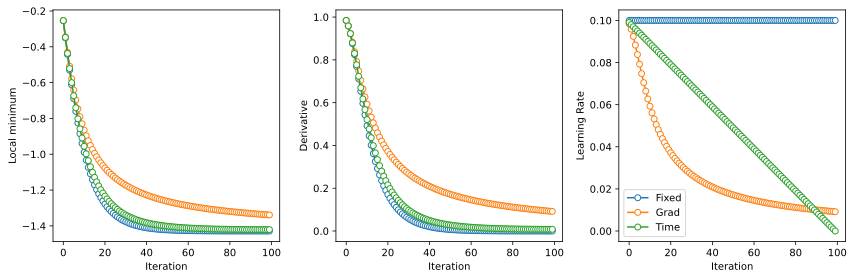

In [46]:
from IPython.core.formatters import MarkdownFormatter
# plot the results

fig, ax = plt.subplots(1,3,figsize=(12,4))

for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed','Grad','Time'])

plt.tight_layout()
plt.show()



### Vanishing Gradients and Exploding Gradients

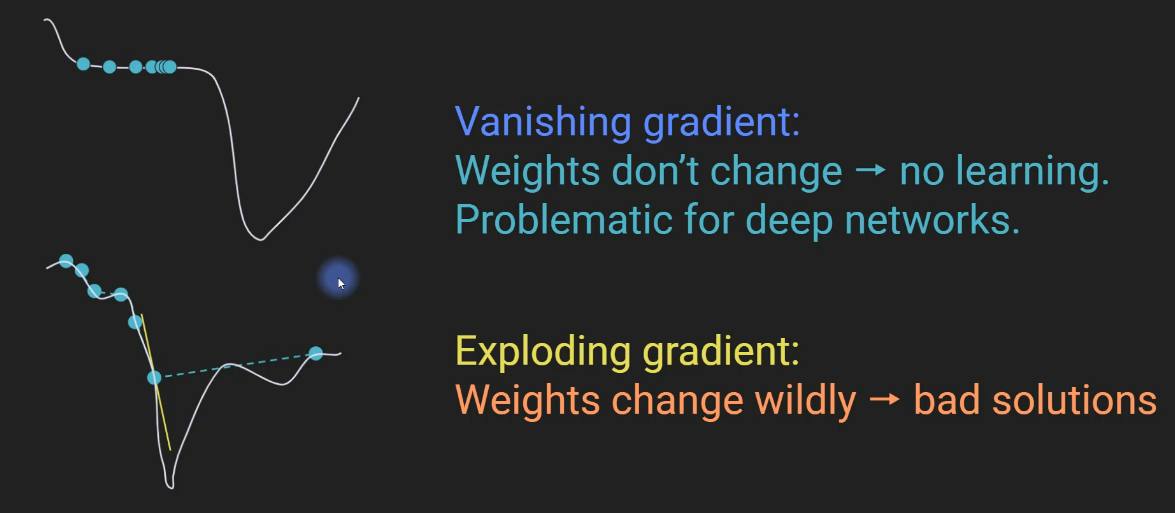